<a href="https://colab.research.google.com/github/AbhilashPal/BanglaOCR/blob/master/BanglaOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()


Saving FinalSolution.npy to FinalSolution (1).npy


In [0]:
!pip install bijoy2unicode

  Stored in directory: /root/.cache/pip/wheels/4d/2c/e1/e7812042b0f07bdb7e14624f89d40b8387058bbd6ca9d8eb81
Successfully built bijoy2unicode


In [0]:
!ls

'FinalSolution (1).npy'  'my_model200 (1).h5'   sample_data
 FinalSolution.npy	  my_model3.h5


In [0]:
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from bijoy2unicode import converter
test = converter.Unicode()

In [0]:
FSNew = np.load("FinalSolution.npy",allow_pickle = True).item()

In [0]:
x_offset=45
y_offset=5
FSFinal = []
for i in range(len(FSNew['x'])):
    p = np.ones((40,300))
    s_img = FSNew['x'][i]
    p[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img
    FSFinal.append(p)

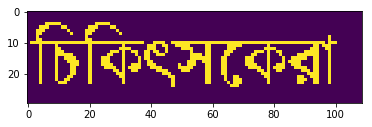

চিকিৎসকেরা 


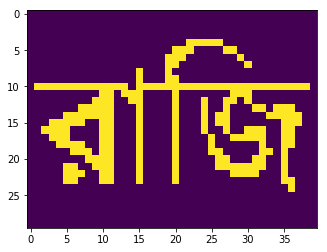

রাজি 


In [0]:

ra = []
for i in range(2):
    ra.append(random.randint(0,300))
for i in ra:
    plt.imshow(FSNew['x'][i])
#     print(FSNew['x'][i])
    plt.show()
    print(test.convertBijoyToUnicode(FSNew['y'][i]+" "))

In [0]:
x_offset=45
y_offset=5
FSFinal = []
for i in range(len(FSNew['x'])):
    p = np.ones((40,300))
    s_img = FSNew['x'][i]
    x_offset = int(150 - (s_img.shape[1]/2 ))
    p[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img
    FSFinal.append(p)

In [0]:
FSNew['x'] = FSFinal

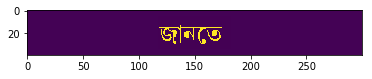

জানতে 
Rvb‡Z


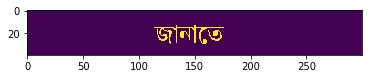

জানাতে 
Rvbv‡Z


In [0]:
ra = []
for i in range(2):
    ra.append(random.randint(0,3000))
for i in ra:
    plt.imshow(FSNew['x'][i])
    plt.show()
    print(test.convertBijoyToUnicode(FSNew['y'][i]+" "))
    print(FSNew['y'][i])

In [0]:
len(FSNew['x'])

4346

In [0]:
tlist = FSNew['y']
vocab = list(set(" ".join(tlist)))
c2i = {vocab[i]:i for i in range(len(vocab))}
i2c = {i:vocab[i] for i in range(len(vocab))}
  

In [0]:
def char2id(s):
    r = []
    for c in s:
        r.append(c2i[c])
    return(r)

def id2char(i):
    r = []
    for c in i:
        r.append(i2c[c])
    return(r)

def conv2ctc(d):
    res = {"the_input":d['x']}
    res['the_labels'] = []
    res['input_length'] = []
    res['label_length'] = []
    res['source_str'] = []
    ylist = d['y']
    for i in ylist:
        r = char2id(i)
        ll = [len(r)]
        labels = [len(vocab)+1] * 30
        labels[:len(r)] = r
        inp_leng = [30]
        res['the_labels'].append(labels)
        res['input_length'].append(inp_leng)
        res['label_length'].append(ll)
        res['source_str'].append(i)
    return res
        
    

In [0]:
ctcdata = conv2ctc(FSNew)

In [0]:
def ttsplit(d):
    X_train, X_test, y_train, y_test = train_test_split(
    d['x'], d['y'], test_size=0.2, random_state=42)
    return(X_train,X_test,y_train,y_test)

X_train, X_test, y_train, y_test = ttsplit(FSNew)

In [0]:
FSTrain = {"x":X_train,"y":y_train}
FSTest = {"x":X_test,"y":y_test}

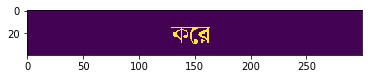

করে 
K‡i


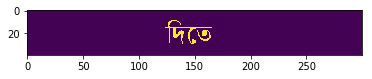

দিতে 
w`‡Z


In [0]:
ra = []
for i in range(2):
    ra.append(random.randint(0,len(FSTrain['x'])))
for i in ra:
    plt.imshow(FSTrain['x'][i])
    plt.show()
    print(test.convertBijoyToUnicode(FSTrain['y'][i]+" "))
    print(FSTrain['y'][i])

In [0]:
ctcTrain = conv2ctc(FSTrain)
ctcTest = conv2ctc(FSTest)

In [0]:
def createbatches(d,batchsize=32):
    n = batchsize
    batched = {}
    for j in d:
        final = [d[j][i * n:(i + 1) * n] for i in range((len(d[j]) + n - 1) // n )]
        final.pop()
        batched[j] = final
    return batched

In [0]:
btTest = createbatches(ctcTest)
btTrain = createbatches(ctcTrain)

In [0]:
def ffinalbtc(btc):
  finalbtc = []
  for i in range(len(btc["the_input"])):
      t = (
          {
              "the_input" : np.array(btc['the_input'][i]).reshape(32,300,40,1) ,
              "the_labels" : np.array(btc["the_labels"][0]),
              "input_length" : np.array(btc["input_length"][i]),
              "label_length" : np.array(btc["label_length"][i]),
              "source_str" : btc["source_str"][i]
          },
          {
              'ctc':np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
          }
      )
      finalbtc.append(t)
  return finalbtc

In [0]:
finalTrain = ffinalbtc(btTrain)
finalTest = ffinalbtc(btTest)

In [0]:
len(finalTrain)

108

In [0]:
finalTrain[0]

({'input_length': array([[30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30],
         [30]]), 'label_length': array([[ 4],
         [10],
         [ 6],
         [ 6],
         [ 6],
         [ 7],
         [ 4],
         [ 7],
         [ 6],
         [ 4],
         [ 8],
         [ 5],
         [ 5],
         [ 6],
         [ 6],
         [ 4],
         [ 8],
         [ 3],
         [ 6],
         [10],
         [ 6],
         [ 9],
         [ 3],
         [ 4],
         [ 4],
         [ 3],
         [ 6],
         [ 2],
         [ 6],
         [ 6],
         [ 4],
         [ 5]]), 'sourc

In [0]:
import os
import itertools
import codecs
import re
import datetime
from keras.models import load_model
import editdistance
import numpy as np
from scipy import ndimage
# import pylab
import matplotlib.pyplot as plt
from keras import backend as K
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input, Dense, Activation
from keras.layers import Reshape, Lambda
from keras.layers.merge import add, concatenate
from keras.models import Model
from keras.layers.recurrent import GRU
from keras.optimizers import SGD
from keras.utils.data_utils import get_file
from keras.preprocessing import image
import keras.callbacks

Using TensorFlow backend.


In [0]:
m = FSNew['x']
n = FSNew['y']

Converting strings to one hot encoding.

In [0]:
def data_gen():
  while True:
    for i in finalTrain:
        yield i

    
def val_gen():
  while True:
    for x in finalTest:
        yield x
    
# the actual loss calc occurs here despite it not being
# an internal Keras loss function

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage:
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)


# For a real OCR application, this should be beam search with a dictionary
# and language model.  For this example, best path is sufficient.

def decode_batch(test_func, word_batch):
    out = test_func([word_batch])[0]
    ret = []
    for j in range(out.shape[0]):
        out_best = list(np.argmax(out[j, 2:], 1))
        out_best = [k for k, g in itertools.groupby(out_best)]
        outstr = labels_to_text(out_best)
        ret.append(outstr)
    return ret


In [0]:

# Input Parameters
img_w = 300
img_h = 40
words_per_epoch = 16000
val_split = 0.2
val_words = int(words_per_epoch * (val_split))

# Network parameters
conv_filters = 16
kernel_size = (3, 3)
pool_size = 2
time_dense_size = 32
rnn_size = 512
minibatch_size = 32


OutputSize = 84
absolute_max_string_len = 30
start_epoch = 0
stop_epoch = 10

if K.image_data_format() == 'channels_first':
    input_shape = (1, img_w, img_h)
else:
    input_shape = (img_w, img_h, 1)




# Model


act = 'relu'
input_data = Input(name='the_input', shape=input_shape, dtype='float32')
inner = Conv2D(conv_filters, kernel_size, padding='same',
               activation=act, kernel_initializer='he_normal',
               name='conv1')(input_data)
inner = MaxPooling2D(pool_size=(pool_size, pool_size), name='max1')(inner)
inner = Conv2D(conv_filters, kernel_size, padding='same',
               activation=act, kernel_initializer='he_normal',
               name='conv2')(inner)
inner = MaxPooling2D(pool_size=(pool_size, pool_size), name='max2')(inner)

conv_to_rnn_dims = (img_w // (pool_size ** 2), (img_h // (pool_size ** 2)) * conv_filters)
inner = Reshape(target_shape=conv_to_rnn_dims, name='reshape')(inner)

# cuts down input size going into RNN:
inner = Dense(time_dense_size, activation=act, name='dense1')(inner)

# Two layers of bidirectional GRUs
# GRU seems to work as well, if not better than LSTM:
gru_1 = GRU(rnn_size, return_sequences=True, kernel_initializer='he_normal', name='gru1')(inner)
gru_1b = GRU(rnn_size, return_sequences=True, go_backwards=True, kernel_initializer='he_normal', name='gru1_b')(inner)
gru1_merged = add([gru_1, gru_1b])
gru_2 = GRU(rnn_size, return_sequences=True, kernel_initializer='he_normal', name='gru2')(gru1_merged)
gru_2b = GRU(rnn_size, return_sequences=True, go_backwards=True, kernel_initializer='he_normal', name='gru2_b')(gru1_merged)

# transforms RNN output to character activations:
inner = Dense(OutputSize, kernel_initializer='he_normal',
              name='dense2')(concatenate([gru_2, gru_2b]))
y_pred = Activation('softmax', name='softmax')(inner)
Model(inputs=input_data, outputs=y_pred).summary()

labels = Input(name='the_labels', shape=[absolute_max_string_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
# Keras doesn't currently support loss funcs with extra parameters
# so CTC loss is implemented in a lambda layer
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])

# clipnorm seems to speeds up convergence
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5)

model = Model(inputs=[input_data, labels, input_length, label_length], outputs=loss_out)

# the loss calc occurs elsewhere, so use a dummy lambda func for the loss
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=sgd)
if start_epoch > 0:
    weight_file = os.path.join(OUTPUT_DIR, os.path.join(run_name, 'weights%02d.h5' % (start_epoch - 1)))
    model.load_weights(weight_file)
# captures output of softmax so we can decode the output during visualization
test_func = K.function([input_data], [y_pred])

#     viz_cb = VizCallback(run_name, test_func, img_gen.next_val())




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input (InputLayer)          (None, 300, 40, 1)   0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 300, 40, 16)  160         the_input[0][0]                  
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 150, 20, 16)  0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 150, 20, 16)  2320        max1[0][0]                       
__________________________________________________________________________________________________
max2 (MaxP

In [0]:
model.fit_generator(generator=data_gen(),
                    steps_per_epoch=108,
                    epochs=100,
                    validation_data=val_gen(),
                    validation_steps=27,
                    initial_epoch=0)

Epoch 1/100
108/108 [==============================] - 79s 729ms/step - loss: 19.3143 - val_loss: 18.1576
Epoch 2/100
108/108 [==============================] - 70s 650ms/step - loss: 15.5628 - val_loss: 17.9750
Epoch 3/100
108/108 [==============================] - 70s 651ms/step - loss: 14.8880 - val_loss: 17.7126
Epoch 4/100
108/108 [==============================] - 70s 650ms/step - loss: 14.4512 - val_loss: 18.0244
Epoch 5/100
108/108 [==============================] - 70s 650ms/step - loss: 14.1527 - val_loss: 18.3078
Epoch 6/100
108/108 [==============================] - 71s 655ms/step - loss: 14.0327 - val_loss: 18.3236
Epoch 7/100
108/108 [==============================] - 70s 652ms/step - loss: 13.9751 - val_loss: 18.6399
Epoch 8/100
108/108 [==============================] - 70s 651ms/step - loss: 13.8829 - val_loss: 18.8626
Epoch 9/100
108/108 [==============================] - 71s 653ms/step - loss: 13.7897 - val_loss: 18.8070
Epoch 10/100
108/108 [========================

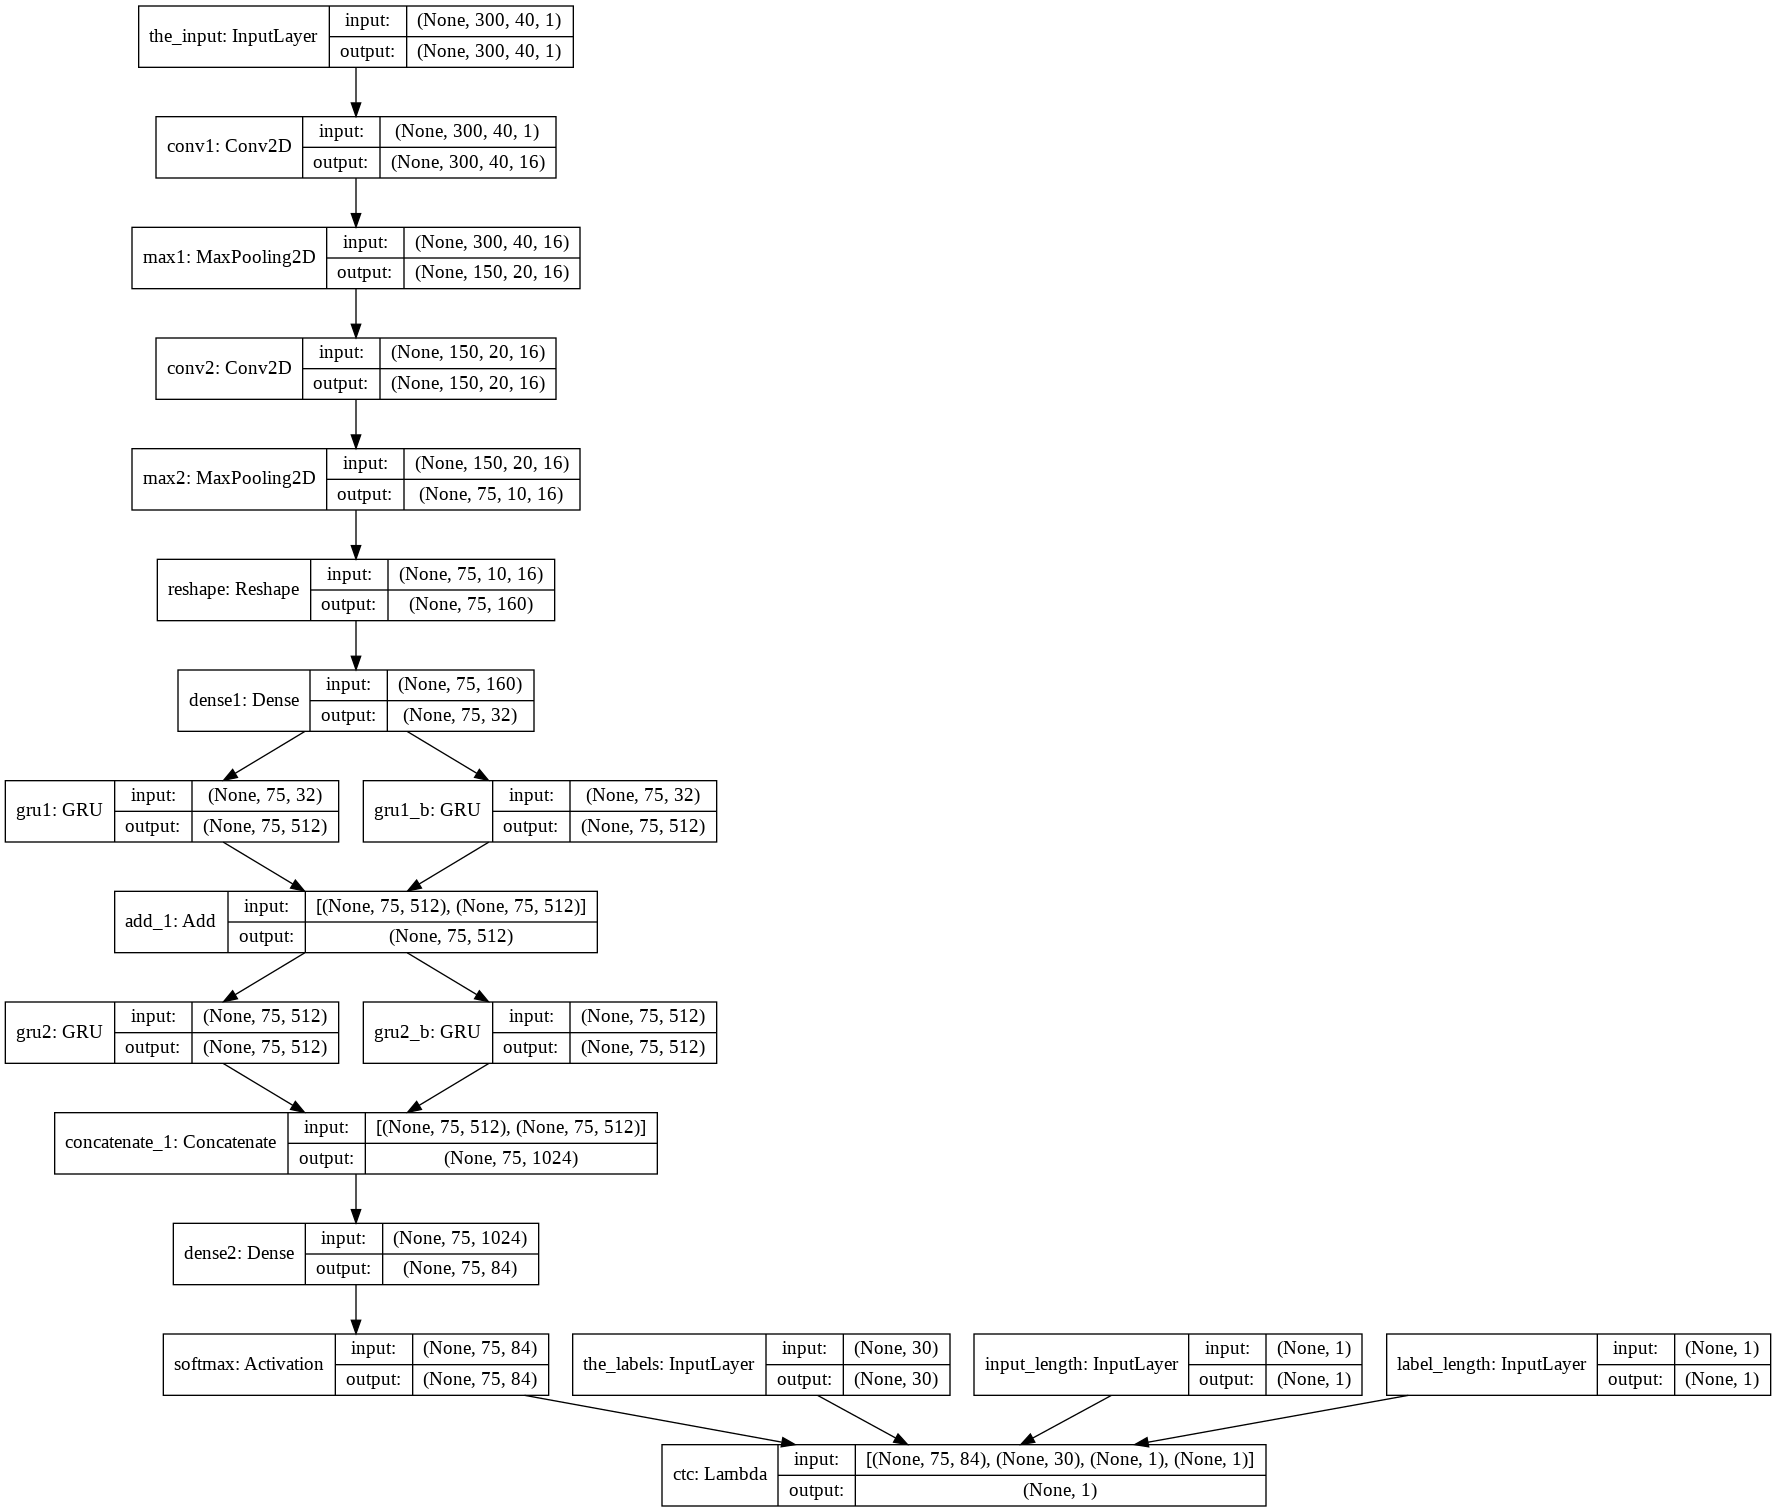

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image(filename='model.png')

In [0]:


model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [0]:
files.download('my_model.h5') 

In [0]:
files.upload()

Saving my_model200.h5 to my_model200.h5


In [0]:
!ls

In [0]:
weight_file = "my_model3.h5"
# Input Parameters
img_w = 300
img_h = 40
words_per_epoch = 16000
val_split = 0.2
val_words = int(words_per_epoch * (val_split))

# Network parameters
conv_filters = 16
kernel_size = (3, 3)
pool_size = 2
time_dense_size = 32
rnn_size = 512
minibatch_size = 32


OutputSize = 84
absolute_max_string_len = 30
start_epoch = 0
stop_epoch = 10

if K.image_data_format() == 'channels_first':
    input_shape = (1, img_w, img_h)
else:
    input_shape = (img_w, img_h, 1)




# Model


act = 'relu'
input_data = Input(name='the_input', shape=input_shape, dtype='float32')
inner = Conv2D(conv_filters, kernel_size, padding='same',
               activation=act, kernel_initializer='he_normal',
               name='conv1')(input_data)
inner = MaxPooling2D(pool_size=(pool_size, pool_size), name='max1')(inner)
inner = Conv2D(conv_filters, kernel_size, padding='same',
               activation=act, kernel_initializer='he_normal',
               name='conv2')(inner)
inner = MaxPooling2D(pool_size=(pool_size, pool_size), name='max2')(inner)

conv_to_rnn_dims = (img_w // (pool_size ** 2), (img_h // (pool_size ** 2)) * conv_filters)
inner = Reshape(target_shape=conv_to_rnn_dims, name='reshape')(inner)

# cuts down input size going into RNN:
inner = Dense(time_dense_size, activation=act, name='dense1')(inner)

# Two layers of bidirectional GRUs
# GRU seems to work as well, if not better than LSTM:
gru_1 = GRU(rnn_size, return_sequences=True, kernel_initializer='he_normal', name='gru1')(inner)
gru_1b = GRU(rnn_size, return_sequences=True, go_backwards=True, kernel_initializer='he_normal', name='gru1_b')(inner)
gru1_merged = add([gru_1, gru_1b])
gru_2 = GRU(rnn_size, return_sequences=True, kernel_initializer='he_normal', name='gru2')(gru1_merged)
gru_2b = GRU(rnn_size, return_sequences=True, go_backwards=True, kernel_initializer='he_normal', name='gru2_b')(gru1_merged)

# transforms RNN output to character activations:
inner = Dense(OutputSize, kernel_initializer='he_normal',
              name='dense2')(concatenate([gru_2, gru_2b]))
y_pred = Activation('softmax', name='softmax')(inner)
Model(inputs=input_data, outputs=y_pred).summary()

labels = Input(name='the_labels', shape=[absolute_max_string_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
# Keras doesn't currently support loss funcs with extra parameters
# so CTC loss is implemented in a lambda layer
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])

# clipnorm seems to speeds up convergence
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5)

model_ = Model(inputs=[input_data, labels, input_length, label_length], outputs=loss_out)

# the loss calc occurs elsewhere, so use a dummy lambda func for the loss
model_.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=sgd)
model_.load_weights(weight_file)
# captures output of softmax so we can decode the output during visualization
test_func = K.function([input_data], [y_pred])

In [0]:
model_.fit_generator(generator=data_gen(),
                    steps_per_epoch=108,
                    epochs=100,
                    validation_data=val_gen(),
                    validation_steps=27,
                    initial_epoch=0)

In [0]:
model_.save('my_model4.h5')  # creates a HDF5 file 'my_model.h5'

In [0]:
files.download('my_model4.h5') 

In [0]:
model_.fit_generator(generator=data_gen(),
                    steps_per_epoch=108,
                    epochs=100,
                    validation_data=val_gen(),
                    validation_steps=27,
                    initial_epoch=0)

In [0]:
model_.save('my_model5.h5')  # creates a HDF5 file 'my_model.h5'
files.download('my_model5.h5') 

In [0]:
model_p = Model(inputs=input_data, outputs=y_pred)

In [0]:
def decode_predict_ctc(out, top_paths = 1):
    results = []
    beam_width = 5
    if beam_width < top_paths:
      beam_width = top_paths
    for i in range(top_paths):
      lables = K.get_value(K.ctc_decode(out, input_length=np.ones(out.shape[0])*out.shape[1],
                           greedy=False, beam_width=beam_width, top_paths=top_paths)[0][i])[0]
#       text = labels_to_text(lables)
      results.append(lables)
    return results

In [0]:
img = FSTest['x'][-1]
plt.imshow(img)

In [0]:
img = img.reshape(1,40,300)
c = np.expand_dims(img.T, axis=0)
c.shape

In [0]:
net_out_value = model_p.predict(c)

In [0]:
net_out_value

In [0]:
pred_texts = decode_predict_ctc(net_out_value)
pred_texts

In [0]:
q = id2char(pred_texts[0])

In [0]:
plt.imshow(net_out_value[0].T, cmap='binary', interpolation='nearest')
plt.show()

In [0]:
q

In [0]:
m = "".join(q)

In [0]:
test.convertBijoyToUnicode(m)

In [0]:
model.fit_generator(generator=data_gen(),
                    steps_per_epoch=108,
                    epochs=100,
                    validation_data=val_gen(),
                    validation_steps=27,
                    initial_epoch=0)

In [0]:
model.save('my_model2.h5') 

In [0]:
files.download('my_model2.h5') 

In [0]:
model_p = Model(inputs=input_data, outputs=y_pred)

In [0]:
net_out_value = model_p.predict(c)
pred_texts = decode_predict_ctc(net_out_value)
q = id2char(pred_texts[0])

In [0]:
plt.imshow(net_out_value[0].T, cmap='binary', interpolation='nearest')
plt.show()

In [0]:
q

In [0]:
m = "".join(q)
test.convertBijoyToUnicode(m)